# Part 1: Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import balanced_accuracy_score

In [2]:
Toddlers_data = pd.read_csv('/kaggle/input/toddler-autism-dataset/Toddler_Autism_dataset_July_2018.csv',index_col='Case_No')
print(Toddlers_data.head())

         A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
Case_No                                                                      
1         0   0   0   0   0   0   1   1   0    1        28               3   
2         1   1   0   0   0   1   1   0   0    0        36               4   
3         1   0   0   0   0   0   1   1   0    1        36               4   
4         1   1   1   1   1   1   1   1   1    1        24              10   
5         1   1   0   1   1   1   1   1   1    1        20               9   

        Sex       Ethnicity Jaundice Family_mem_with_ASD  \
Case_No                                                    
1         f  middle eastern      yes                  no   
2         m  White European      yes                  no   
3         m  middle eastern      yes                  no   
4         m        Hispanic       no                  no   
5         f  White European       no                 yes   

        Who completed the test C

In [3]:
# Specify the input and output 
Toddlers_data = Toddlers_data.rename(columns={'Class/ASD Traits ': 'Class/ASD Traits'})
y = Toddlers_data['Class/ASD Traits'].values #output variables
X = Toddlers_data.drop('Class/ASD Traits', axis=1, inplace=False) #input variables

In [4]:
#Count the number of variables:
variable_count = len(Toddlers_data.columns)
print("Number of variables:", variable_count)

Number of variables: 18


In [5]:
#Determine the types of variables:
variable_types = Toddlers_data.dtypes
print("Variable types:")
print(variable_types)

Variable types:
A1                         int64
A2                         int64
A3                         int64
A4                         int64
A5                         int64
A6                         int64
A7                         int64
A8                         int64
A9                         int64
A10                        int64
Age_Mons                   int64
Qchat-10-Score             int64
Sex                       object
Ethnicity                 object
Jaundice                  object
Family_mem_with_ASD       object
Who completed the test    object
Class/ASD Traits          object
dtype: object


In [6]:
#Calculate mean
mean_values = Toddlers_data.mean(numeric_only=True)

#Print mean 
print("Mean values:")
print(mean_values)

Mean values:
A1                 0.563567
A2                 0.448767
A3                 0.401328
A4                 0.512334
A5                 0.524668
A6                 0.576850
A7                 0.649905
A8                 0.459203
A9                 0.489564
A10                0.586338
Age_Mons          27.867173
Qchat-10-Score     5.212524
dtype: float64


In [7]:
#Calculate standard deviation
std_values = Toddlers_data.std(numeric_only=True)

# print standard deviation
print("Standard deviation values:")
print(std_values)

Standard deviation values:
A1                0.496178
A2                0.497604
A3                0.490400
A4                0.500085
A5                0.499628
A6                0.494293
A7                0.477226
A8                0.498569
A9                0.500128
A10               0.492723
Age_Mons          7.980354
Qchat-10-Score    2.907304
dtype: float64


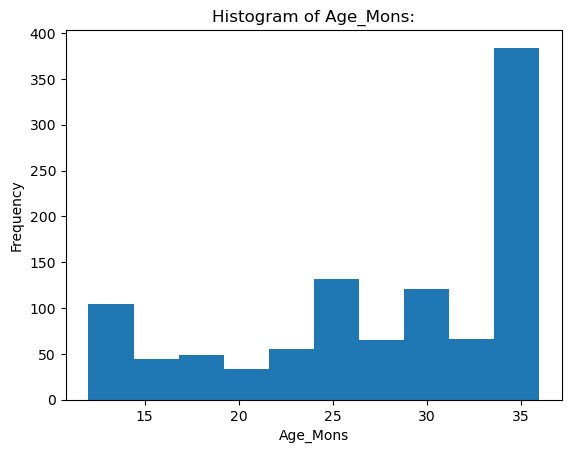

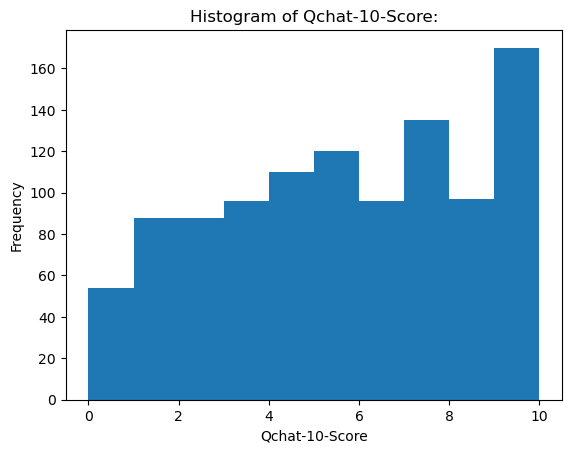

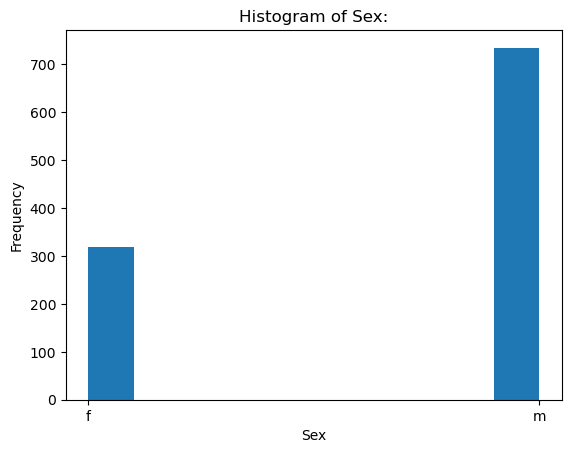

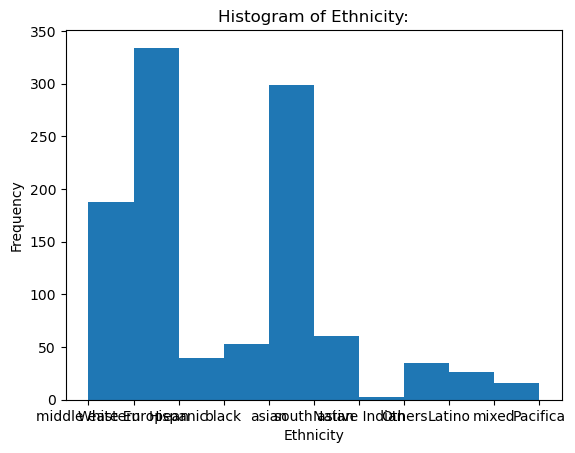

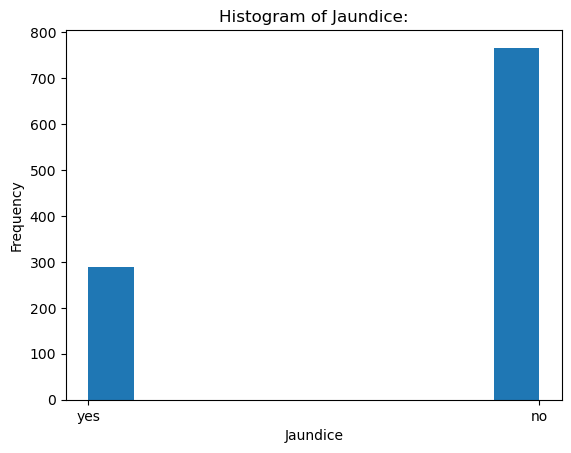

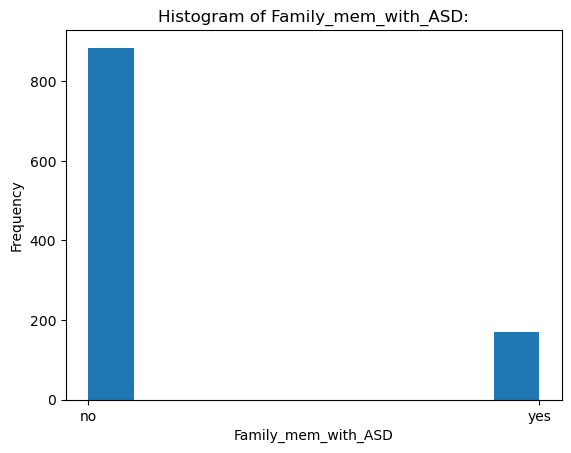

In [8]:
#Draw histograms of main features
main_features = Toddlers_data[['Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity','Jaundice','Family_mem_with_ASD']] 
for column in main_features.columns:
    plt.hist(main_features[column], bins=10)  
    plt.xlabel(column)                        
    plt.ylabel('Frequency')                   
    plt.title('Histogram of ' + column + ':')     
    plt.show()

In [9]:
# Check shapes and data types
print(Toddlers_data.shape)  # Verify the shape of Toddlers_data
print(X, y)  # Check the values of x and y

(1054, 18)
         A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
Case_No                                                                      
1         0   0   0   0   0   0   1   1   0    1        28               3   
2         1   1   0   0   0   1   1   0   0    0        36               4   
3         1   0   0   0   0   0   1   1   0    1        36               4   
4         1   1   1   1   1   1   1   1   1    1        24              10   
5         1   1   0   1   1   1   1   1   1    1        20               9   
...      ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...             ...   
1050      0   0   0   0   0   0   0   0   0    1        24               1   
1051      0   0   1   1   1   0   1   0   1    0        12               5   
1052      1   0   1   1   1   1   1   1   1    1        18               9   
1053      1   0   0   0   0   0   0   1   0    1        19               3   
1054      1   1   0   0   1   1   0   1   1    0     

In [10]:
# Print the correlation of the numeric variables only
Toddlers_data["Class/ASD Traits"] = Toddlers_data["Class/ASD Traits"].replace({'Yes': 1, 'No': 0})
target = Toddlers_data['Class/ASD Traits']
correlations = main_features.corrwith(target, numeric_only=True)
print("The Correlation: ")
print(correlations)

The Correlation: 
Age_Mons          0.066831
Qchat-10-Score    0.810423
dtype: float64


In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print("Dataset shape:", Toddlers_data.shape)
print("Number of samples:", len(Toddlers_data))

Dataset shape: (1054, 18)
Number of samples: 1054


In [13]:
categorical_variables = ['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who completed the test']
categorical_features = Toddlers_data.select_dtypes(include=['object']).columns
print("Number of categorical features:", len(categorical_features))
print("Categorical features:", categorical_features)

Number of categorical features: 5
Categorical features: Index(['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test'],
      dtype='object')


In [14]:
df = pd.get_dummies(Toddlers_data, columns = categorical_features)
df.columns[0:]

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Class/ASD Traits', 'Sex_f', 'Sex_m',
       'Ethnicity_Hispanic', 'Ethnicity_Latino', 'Ethnicity_Native Indian',
       'Ethnicity_Others', 'Ethnicity_Pacifica', 'Ethnicity_White European',
       'Ethnicity_asian', 'Ethnicity_black', 'Ethnicity_middle eastern',
       'Ethnicity_mixed', 'Ethnicity_south asian', 'Jaundice_no',
       'Jaundice_yes', 'Family_mem_with_ASD_no', 'Family_mem_with_ASD_yes',
       'Who completed the test_Health Care Professional',
       'Who completed the test_Health care professional',
       'Who completed the test_Others', 'Who completed the test_Self',
       'Who completed the test_family member'],
      dtype='object')

In [15]:
columns_name = df.columns
print(columns_name)

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Class/ASD Traits', 'Sex_f', 'Sex_m',
       'Ethnicity_Hispanic', 'Ethnicity_Latino', 'Ethnicity_Native Indian',
       'Ethnicity_Others', 'Ethnicity_Pacifica', 'Ethnicity_White European',
       'Ethnicity_asian', 'Ethnicity_black', 'Ethnicity_middle eastern',
       'Ethnicity_mixed', 'Ethnicity_south asian', 'Jaundice_no',
       'Jaundice_yes', 'Family_mem_with_ASD_no', 'Family_mem_with_ASD_yes',
       'Who completed the test_Health Care Professional',
       'Who completed the test_Health care professional',
       'Who completed the test_Others', 'Who completed the test_Self',
       'Who completed the test_family member'],
      dtype='object')


In [16]:
main_features2 = df[['Age_Mons',
       'Qchat-10-Score', 'Sex_f', 'Sex_m', 'Ethnicity_Hispanic',
       'Ethnicity_Latino', 'Ethnicity_Native Indian', 'Ethnicity_Others',
       'Ethnicity_Pacifica', 'Ethnicity_White European', 'Ethnicity_asian',
       'Ethnicity_black', 'Ethnicity_middle eastern', 'Ethnicity_mixed',
       'Ethnicity_south asian', 'Jaundice_no', 'Jaundice_yes',
       'Family_mem_with_ASD_no', 'Family_mem_with_ASD_yes',
       'Who completed the test_Health Care Professional',
       'Who completed the test_Health care professional',
       'Who completed the test_Others', 'Who completed the test_Self',
       'Who completed the test_family member']]
main_features3=df[['Age_Mons','Qchat-10-Score', 'Jaundice_no', 
                   'Jaundice_yes','Family_mem_with_ASD_no', 'Family_mem_with_ASD_yes']]

In [17]:
# Print the correlation of the all features
correlations = main_features2.corrwith(target)
correlations

Age_Mons                                           0.066831
Qchat-10-Score                                     0.810423
Sex_f                                             -0.117664
Sex_m                                              0.117664
Ethnicity_Hispanic                                 0.025481
Ethnicity_Latino                                   0.027020
Ethnicity_Native Indian                            0.035752
Ethnicity_Others                                   0.055282
Ethnicity_Pacifica                                 0.034871
Ethnicity_White European                           0.085174
Ethnicity_asian                                    0.024954
Ethnicity_black                                    0.022476
Ethnicity_middle eastern                          -0.181515
Ethnicity_mixed                                   -0.012432
Ethnicity_south asian                             -0.039354
Jaundice_no                                       -0.074060
Jaundice_yes                            

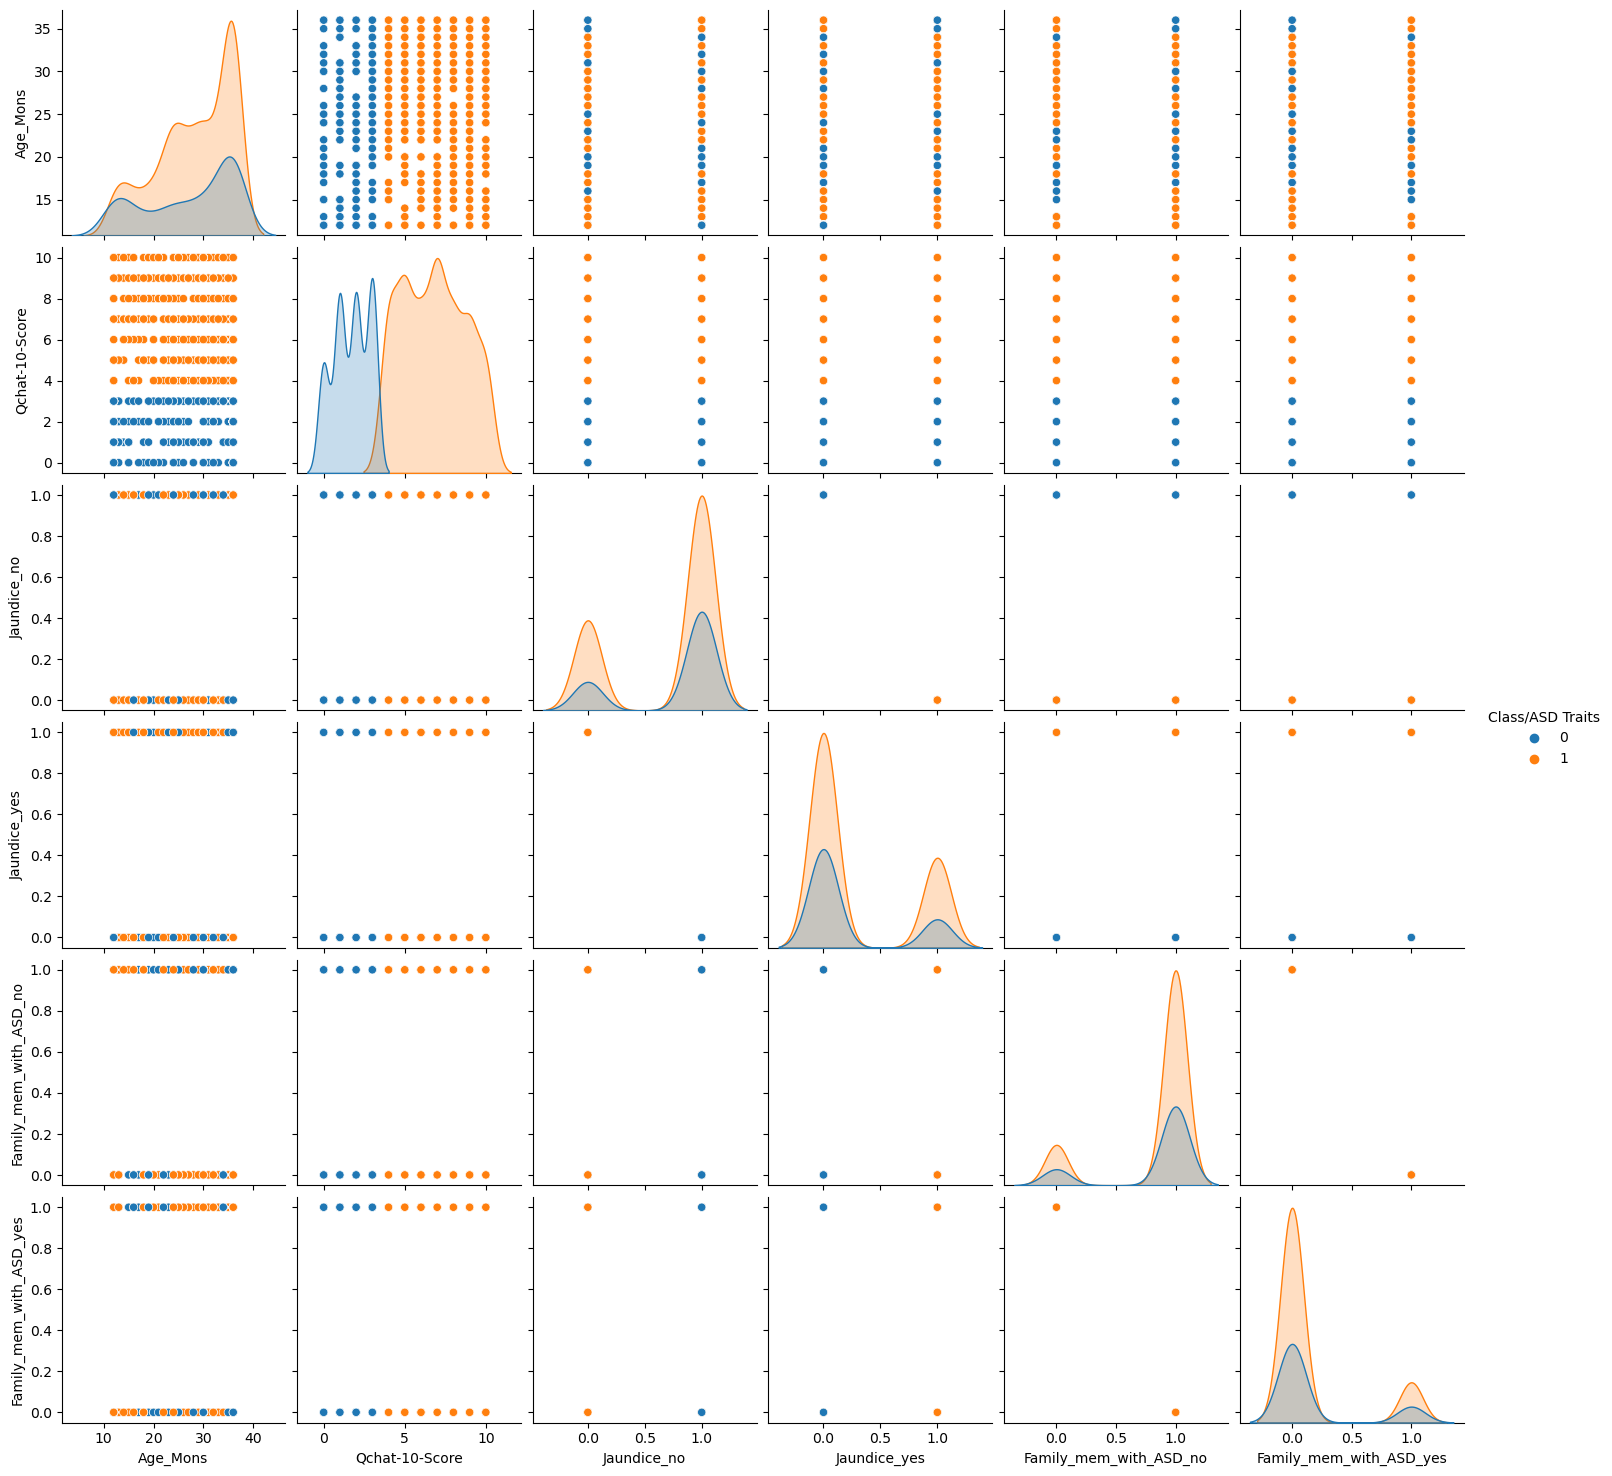

In [18]:
import seaborn as sns
target = Toddlers_data['Class/ASD Traits']
data = main_features3.join(target)

# Create pair plot
sns.pairplot(data, hue='Class/ASD Traits')

<Axes: >

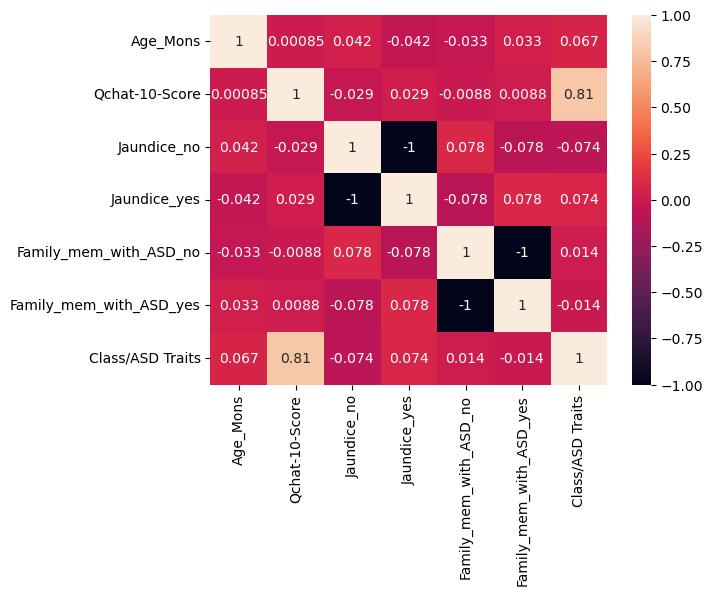

In [19]:
corr_matrix = data.corr()

# Create heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True)

In [20]:
#Calculate mean for all features
mean_values2 = df.mean()

#Print mean for all features
print("Mean values:")
print(mean_values2)


Mean values:
A1                                                  0.563567
A2                                                  0.448767
A3                                                  0.401328
A4                                                  0.512334
A5                                                  0.524668
A6                                                  0.576850
A7                                                  0.649905
A8                                                  0.459203
A9                                                  0.489564
A10                                                 0.586338
Age_Mons                                           27.867173
Qchat-10-Score                                      5.212524
Class/ASD Traits                                    0.690702
Sex_f                                               0.302657
Sex_m                                               0.697343
Ethnicity_Hispanic                                  0.037951
Ethnicity_L

In [21]:
#Calculate standard deviation for all features
std_values = df.std()

# print standard deviation for all features
print("Standard deviation values:")
print(std_values)

Standard deviation values:
A1                                                 0.496178
A2                                                 0.497604
A3                                                 0.490400
A4                                                 0.500085
A5                                                 0.499628
A6                                                 0.494293
A7                                                 0.477226
A8                                                 0.498569
A9                                                 0.500128
A10                                                0.492723
Age_Mons                                           7.980354
Qchat-10-Score                                     2.907304
Class/ASD Traits                                   0.462424
Sex_f                                              0.459626
Sex_m                                              0.459626
Ethnicity_Hispanic                                 0.191168
Ethnicity_Lat

In [22]:
df.isnull().sum()

A1                                                 0
A2                                                 0
A3                                                 0
A4                                                 0
A5                                                 0
A6                                                 0
A7                                                 0
A8                                                 0
A9                                                 0
A10                                                0
Age_Mons                                           0
Qchat-10-Score                                     0
Class/ASD Traits                                   0
Sex_f                                              0
Sex_m                                              0
Ethnicity_Hispanic                                 0
Ethnicity_Latino                                   0
Ethnicity_Native Indian                            0
Ethnicity_Others                              

In [23]:
# Check the balance of unique values in the target class
Toddlers_data['Class/ASD Traits'].value_counts()/float(len(df))

1    0.690702
0    0.309298
Name: Class/ASD Traits, dtype: float64

In [24]:
# Check the balance of unique values in the target class
class_counts = Toddlers_data['Class/ASD Traits'].value_counts()
n_samples = len(Toddlers_data)
class_dist = class_counts / n_samples
print(" Class distribution:\n", class_dist)

 Class distribution:
 1    0.690702
0    0.309298
Name: Class/ASD Traits, dtype: float64


In [25]:
y_num = target.values
X_num= df[columns_name] 
x_train, x_test, y_train, y_test = train_test_split(X_num, y_num, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Part 2: Train on the KNN model

In [27]:
# Train KNN classifier
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier()  
classifier.fit(x_train, y_train)  

KNeighborsClassifier()

In [28]:
# Evaluate the model performance
y_pred = classifier.predict(x_test)

# Calculate evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
BAR = balanced_accuracy_score(y_test, y_pred)
BER=1- BAR

print("Evaluation Metrics: ")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print('alanced Accuracy Rate: ',BAR)
print('Balanced Error Rate: ',BER)

Evaluation Metrics: 
Accuracy:  0.9715639810426541
Precision:  0.9857142857142858
Recall:  0.971830985915493
alanced Accuracy Rate:  0.971422739334558
Balanced Error Rate:  0.028577260665441973


# Part 3: Train on the KNN model different hyperparameters 

In [29]:
from sklearn.neighbors import KNeighborsClassifier 
# Trying different hyperparameters
classifier= KNeighborsClassifier(n_neighbors=3)  
classifier.fit(x_train, y_train)  

KNeighborsClassifier(n_neighbors=3)

In [30]:
y_pred2 = classifier.predict(x_test)
# Calculate evaluation
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)

BAR2 = balanced_accuracy_score(y_test, y_pred2)
BER2=1- BAR2

print("Evaluation Metrics: ")
print("Accuracy: ", accuracy2)
print("Precision: ", precision2)
print("Recall: ", recall2)
print('alanced Accuracy Rate: ',BAR2)
print('Balanced Error Rate: ',BER2)

Evaluation Metrics: 
Accuracy:  0.985781990521327
Precision:  0.9929078014184397
Recall:  0.9859154929577465
alanced Accuracy Rate:  0.985711369667279
Balanced Error Rate:  0.014288630332720986


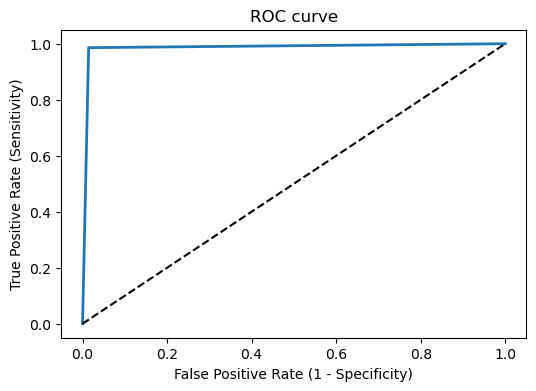

In [31]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred2)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# Part 4: Train on the SVM model

In [32]:
from sklearn.svm import SVC
svc_model=SVC() 
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix  \n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix  

 [[ 68   1]
 [  0 142]]

True Positives(TP) =  68

True Negatives(TN) =  142

False Positives(FP) =  1

False Negatives(FN) =  0


In [34]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification accuracy: ',classification_accuracy)
print('Classification error: ',classification_error)

Classification accuracy:  0.995260663507109
Classification error:  0.004739336492890996


In [35]:
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
f1_score = 2*(precision*recall/(precision+recall))
tpr = TP / (TP + FN)
fpr = FP / (FP + TN)
tnr = TN / (TN + FP)
BAR = (tpr + tnr) / 2
BER = 1 - BAR

print('Precision: ',precision)
print('Recall: ',recall)
print('f1-score: ',f1_score)
print('alanced Accuracy Rate: ',BAR)
print('Balanced Error Rate: ',BER)

Precision:  0.9855072463768116
Recall:  1.0
f1-score:  0.9927007299270074
alanced Accuracy Rate:  0.9965034965034965
Balanced Error Rate:  0.0034965034965035446


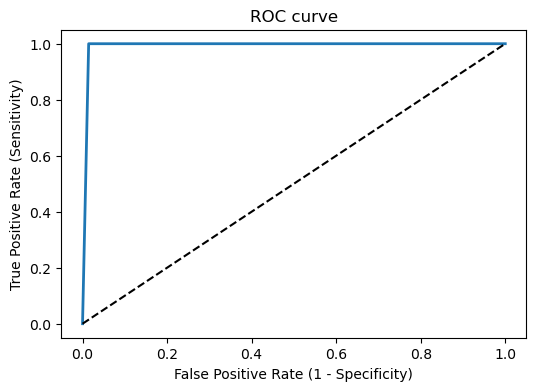

In [36]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [37]:
clf_svc = SVC(kernel='linear', C=1.0) 
clf_svc.fit(x_train, y_train)
y_pred2 = clf_svc.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred2)

print('Confusion matrix for the model with linear kernel \n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix for the model with linear kernel 

 [[ 69   0]
 [  0 142]]

True Positives(TP) =  69

True Negatives(TN) =  142

False Positives(FP) =  0

False Negatives(FN) =  0


In [39]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification accuracy: ',classification_accuracy)
print('Classification error: ',classification_error)

Classification accuracy:  1.0
Classification error:  0.0


In [40]:
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
f1_score = 2*(precision*recall/(precision+recall))
tpr = TP / (TP + FN)
fpr = FP / (FP + TN)
tnr = TN / (TN + FP)
BAR = (tpr + tnr) / 2
BER = 1 - BAR

print('Precision: ',precision)
print('Recall: ',recall)
print('f1-score: ',f1_score)
print('alanced Accuracy Rate: ',BAR)
print('Balanced Error Rate: ',BER)

Precision:  1.0
Recall:  1.0
f1-score:  1.0
alanced Accuracy Rate:  1.0
Balanced Error Rate:  0.0


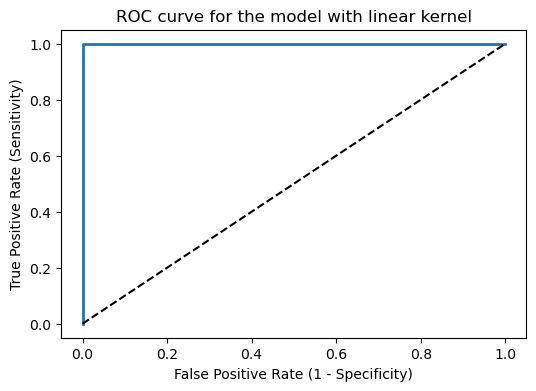

In [41]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred2)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve for the model with linear kernel')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

**Check for overfitting and underfitting**

In [42]:
y_pred_train = clf_svc.predict(x_train)

In [43]:
train_accuracy = accuracy_score(y_train, y_pred_train)
print('Training-set accuracy score:',train_accuracy)

Training-set accuracy score: 1.0


In [44]:
print('Training set score: ',clf_svc.score(x_train, y_train))
print('Test set score: ',clf_svc.score(x_test, y_test))

Training set score:  1.0
Test set score:  1.0


**The confusion matrix shows 69 + 142 = 211 correct predictions and 0 incorrect predictions.**